# Student Performance Indicator
> This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

In [6]:
# Import libraries and packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Data Collection
> Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

The data consists of 8 column and 1000 rows.

In [ ]:
from pathlib import Path
import pandas as pd

def find_project_root(start: Path | None = None) -> Path:
    start = (start or Path.cwd()).resolve()
    for p in [start, *start.parents]:
        if (p / "pyproject.toml").exists():
            return p
    return start  # fallback

PROJECT_ROOT = find_project_root()
DATA_PATH = PROJECT_ROOT / "data" / "raw" / "stud.csv"


In [2]:
df = pd.read_csv(DATA_PATH)
print(df.head())
print(df.shape)
print(df.columns)


   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
(1000, 8)
Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'w

### Dataset info

1. gender : sex of students -> (Male/female)
2. race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
3. parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
4. lunch : having lunch before test (standard or free/reduced)
5. test preparation course : complete or not complete before test
6. math score
7. reading score
8. writing score

### Inspecting dataset

In [ ]:
# Check for missing values
print(df.isnull().sum())

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64


There are no missing values

In [ ]:
# Check for duplicate values
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


There are no duplicate records

In [ ]:
# Check data types
print(df.dtypes)
print(df.info())

gender                           str
race_ethnicity                   str
parental_level_of_education      str
lunch                            str
test_preparation_course          str
math_score                     int64
reading_score                  int64
writing_score                  int64
dtype: object
<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   str  
 1   race_ethnicity               1000 non-null   str  
 2   parental_level_of_education  1000 non-null   str  
 3   lunch                        1000 non-null   str  
 4   test_preparation_course      1000 non-null   str  
 5   math_score                   1000 non-null   int64
 6   reading_score                1000 non-null   int64
 7   writing_score                1000 non-null   int64
dtypes: int64(3), str(5)
memory usag

In [ ]:
# Check No. of unique values in each column
print(df.nunique())

# check No. of unique values in each categorial column
print(df.select_dtypes(include = 'object').nunique()) 

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64
gender                         2
race_ethnicity                 5
parental_level_of_education    6
lunch                          2
test_preparation_course        2
dtype: int64


In [ ]:
# Statistical summary of numerical columns
print(df.describe())

       math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


All means are very close to each other - between 66 and 68.05;
All standard deviations are also close - between 14.6 and 15.19;
While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading much higher = 17

In [ ]:
print("Categories in 'gender' column:", df['gender'].unique())
print("Categories in 'race_ethnicity' column:", df['race_ethnicity'].unique())
print("Categories in 'parental_level_of_education' column:", df['parental_level_of_education'].unique())
print("Categories in 'lunch' column:", df['lunch'].unique())
print("Categories in 'test_preparation_course' column:", df['test_preparation_course'].unique())

Categories in 'gender' column: <StringArray>
['female', 'male']
Length: 2, dtype: str
Categories in 'race_ethnicity' column: <StringArray>
['group B', 'group C', 'group A', 'group D', 'group E']
Length: 5, dtype: str
Categories in 'parental_level_of_education' column: <StringArray>
[ 'bachelor's degree',       'some college',    'master's degree',
 'associate's degree',        'high school',   'some high school']
Length: 6, dtype: str
Categories in 'lunch' column: <StringArray>
['standard', 'free/reduced']
Length: 2, dtype: str
Categories in 'test_preparation_course' column: <StringArray>
['none', 'completed']
Length: 2, dtype: str


In [ ]:
# Show numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("{} Numerical columns: {}".format(len(numerical_cols), numerical_cols))
print("{} Categorical columns: {}".format(len(categorical_cols), categorical_cols))

3 Numerical columns: ['math_score', 'reading_score', 'writing_score']
5 Categorical columns: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding "total_score" and "avg_score" columns

In [4]:

df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['avg_score'] = df['total_score'] / 3
print(df.head(2))

   gender race_ethnicity parental_level_of_education     lunch  \
0  female        group B           bachelor's degree  standard   
1  female        group C                some college  standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   

   total_score  avg_score  
0          218  72.666667  
1          247  82.333333  


In [ ]:
# count No. of students with full marks in each subject
full_marks_math = df[df['math_score'] == 100].shape[0]
full_marks_reading = df[df['reading_score'] == 100].shape[0]
full_marks_writing = df[df['writing_score'] == 100].shape[0]

print(f"Number of students with full marks in Math: {full_marks_math}")
print(f"Number of students with full marks in Reading: {full_marks_reading}")
print(f"Number of students with full marks in Writing: {full_marks_writing}")

Number of students with full marks in Math: 7
Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14


In [ ]:
# Count No. of students no greater than 20 in each subject
less_20_math = df[df['math_score'] < 20].shape[0]
less_20_reading = df[df['reading_score'] < 20].shape[0]
less_20_writing = df[df['writing_score'] < 20].shape[0]
print(f"Number of students with less than 20 marks in Math: {less_20_math}")
print(f"Number of students with less than 20 marks in Reading: {less_20_reading}")
print(f"Number of students with less than 20 marks in Writing: {less_20_writing}")

Number of students with less than 20 marks in Math: 4
Number of students with less than 20 marks in Reading: 1
Number of students with less than 20 marks in Writing: 3


From above values we get students who have performed the worst in Maths
Best performance is in reading section

In [8]:
# A reusable helper to generate clean summary tables
def group_summary(df: pd.DataFrame, group_col: str, include_std: bool = True) -> pd.DataFrame:
    score_cols = ["math_score", "reading_score", "writing_score", "avg_score"]

    agg_dict = {"count": ("avg_score", "size")}
    for c in score_cols:
        agg_dict[f"{c}_mean"] = (c, "mean")
        if include_std:
            agg_dict[f"{c}_std"] = (c, "std")

    out = df.groupby(group_col).agg(**agg_dict).reset_index()

    # Round means/stds for readability
    mean_cols = [c for c in out.columns if c.endswith("_mean")]
    std_cols = [c for c in out.columns if c.endswith("_std")]
    out[mean_cols] = out[mean_cols].round(2)
    out[std_cols] = out[std_cols].round(2)

    return out


## Visualization

## Visualize average score distribution to make some conclusion
Histogram

Kernel Distribution Function (KDE)

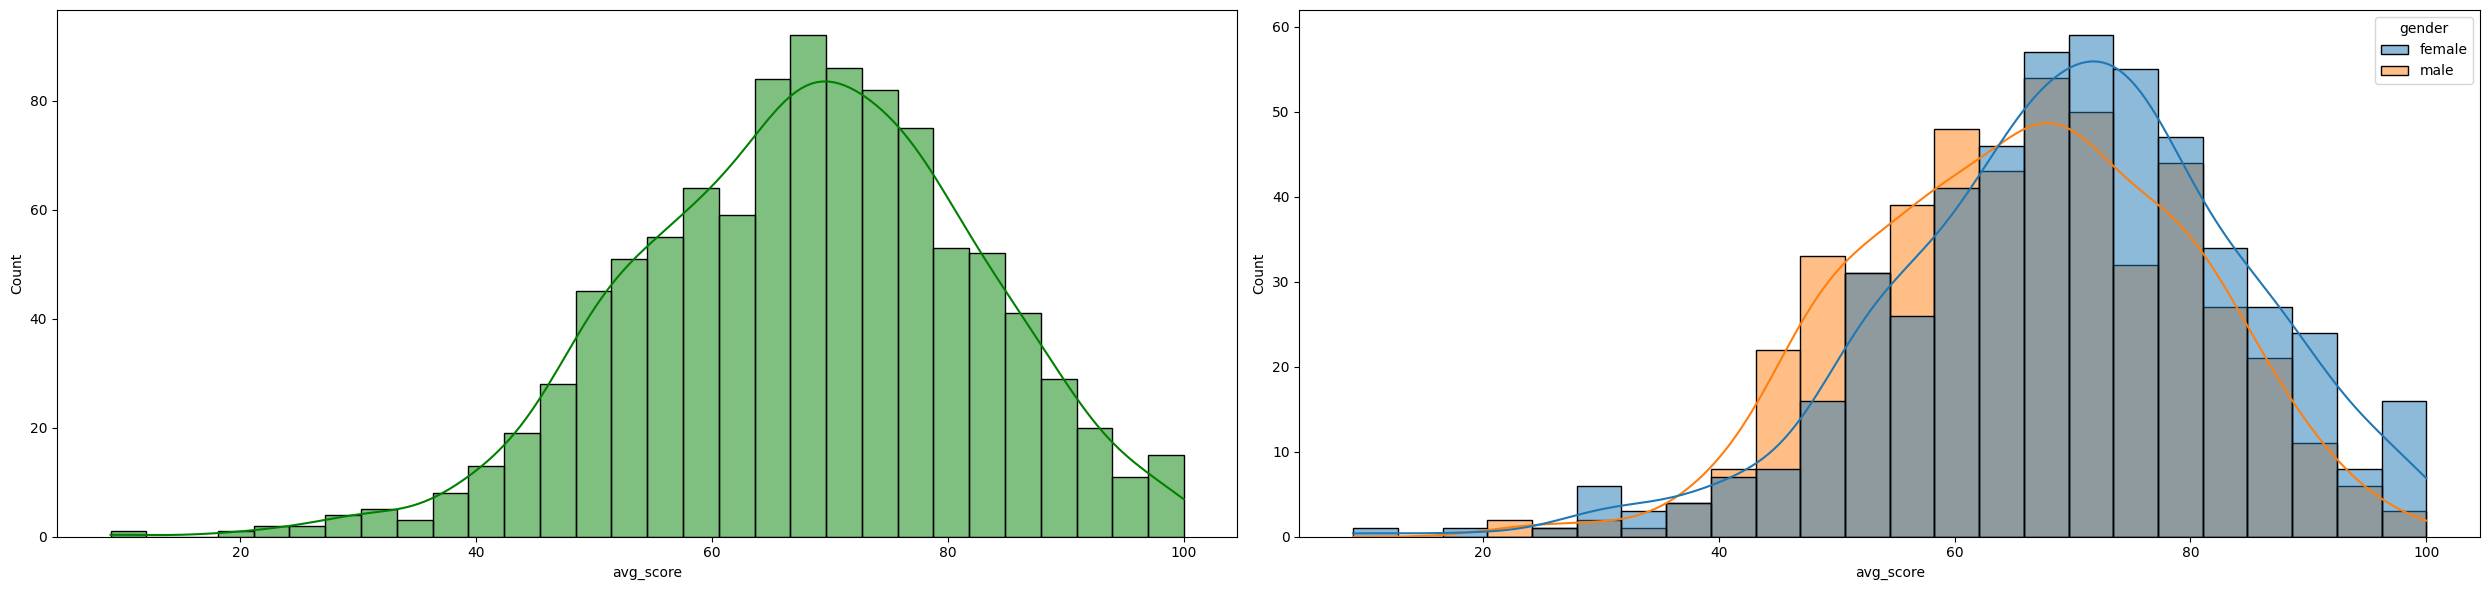

In [ ]:
# Histogram & KDE for average score
fig, axes = plt.subplots(1, 2, figsize=(25, 6))
sns.histplot(data=df, x='avg_score', bins=30, kde=True, color='g', ax=axes[0])
sns.histplot(data=df, x='avg_score', kde=True, hue='gender', ax=axes[1])
plt.tight_layout()
plt.show()

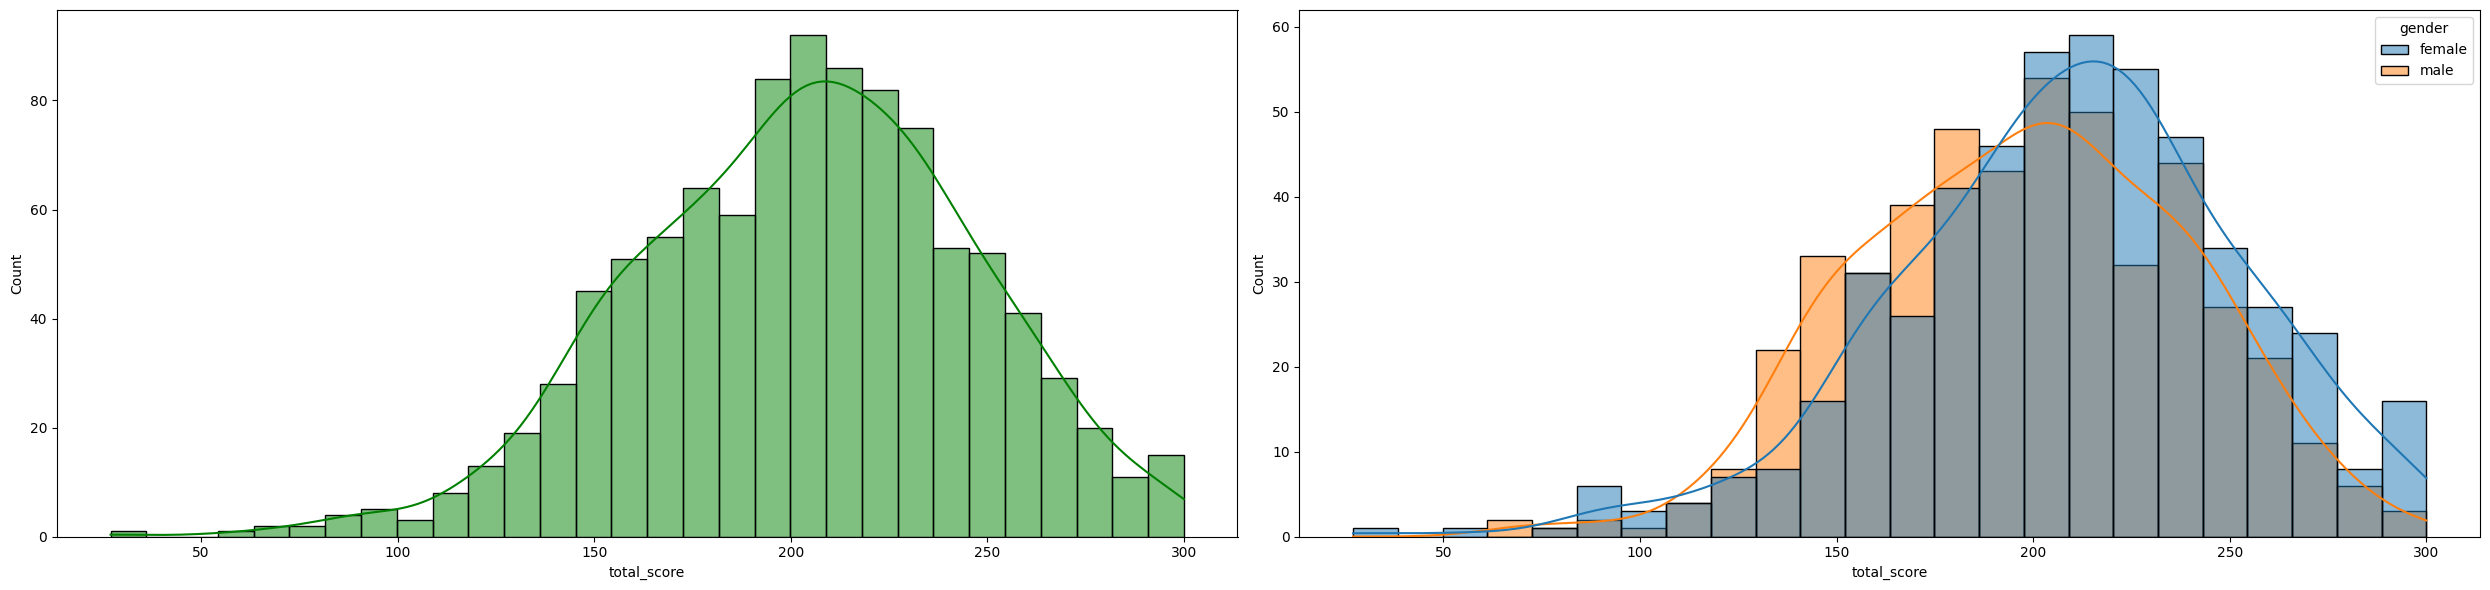

In [ ]:
# Histogram & KDE for total score
fig, axes = plt.subplots(1, 2, figsize=(25, 6))
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g', ax=axes[0])
sns.histplot(data=df, x='total_score', kde=True, hue='gender', ax=axes[1])
plt.tight_layout()
plt.show()


Female students tend to perform well then male students.

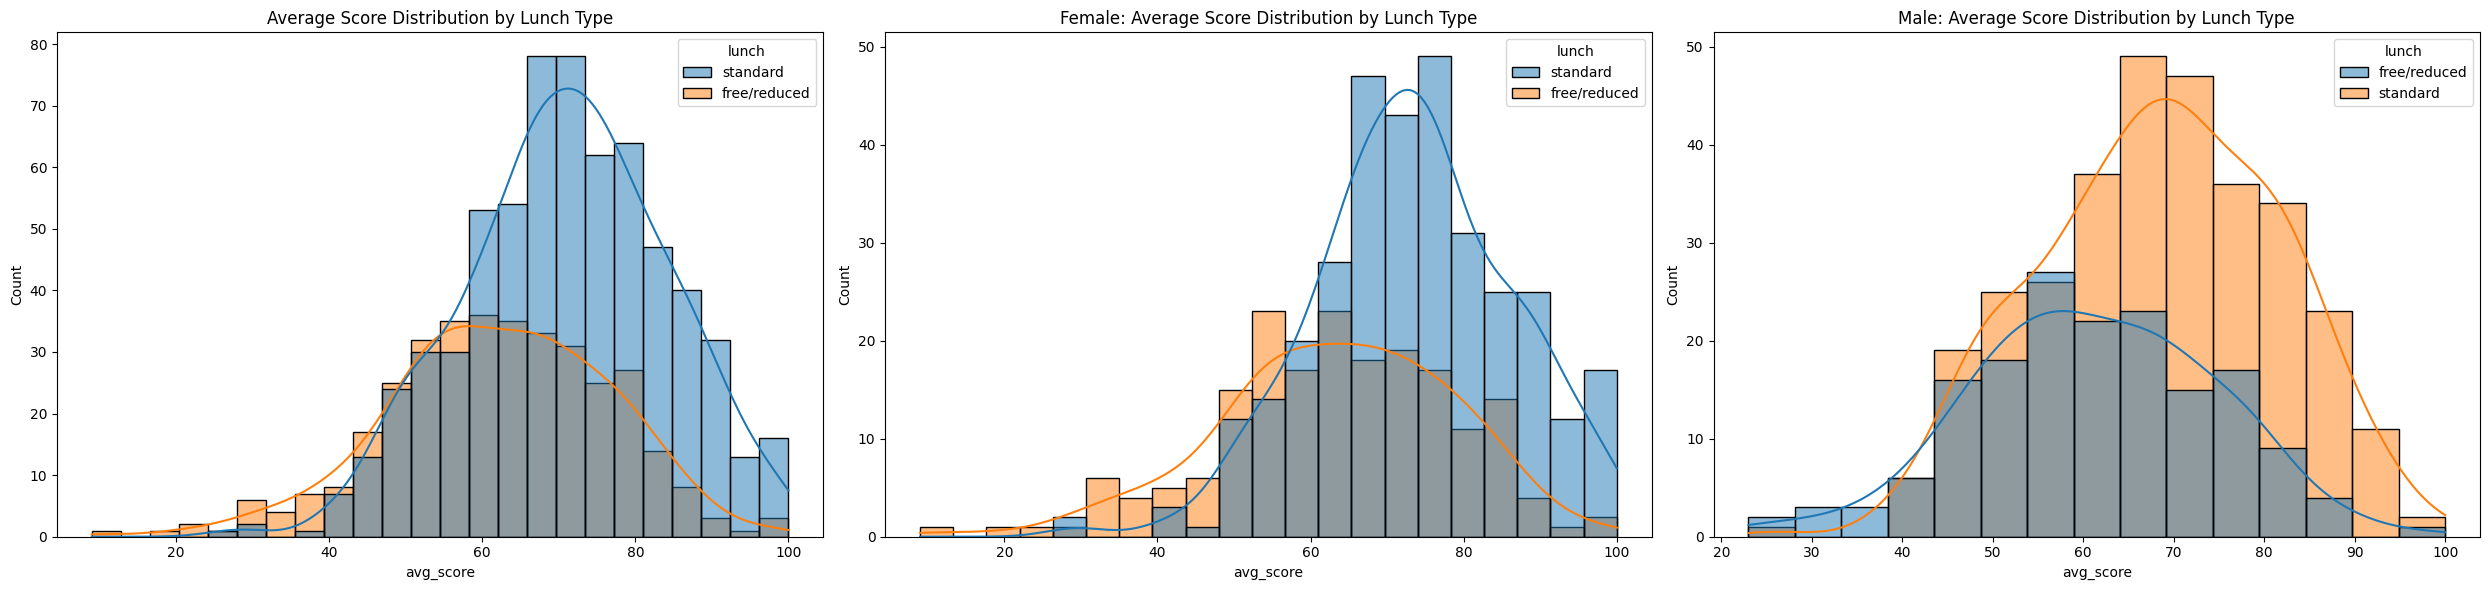

In [ ]:
# Histogram & KDE for average score by lunch
fig, axes = plt.subplots(1, 3, figsize=(25, 6))
sns.histplot(data=df, x='avg_score', kde=True, hue='lunch', ax=axes[0])
axes[0].set_title('Average Score Distribution by Lunch Type')
sns.histplot(data=df[df.gender=='female'], x='avg_score', kde=True, hue='lunch', ax=axes[1])
axes[1].set_title('Female: Average Score Distribution by Lunch Type')
sns.histplot(data=df[df.gender=='male'], x='avg_score', kde=True, hue='lunch', ax=axes[2])
axes[2].set_title('Male: Average Score Distribution by Lunch Type')
plt.tight_layout()
plt.show()


Standard lunch helps perform well in exams.

Standard lunch helps perform well in exams be it a male or a female.

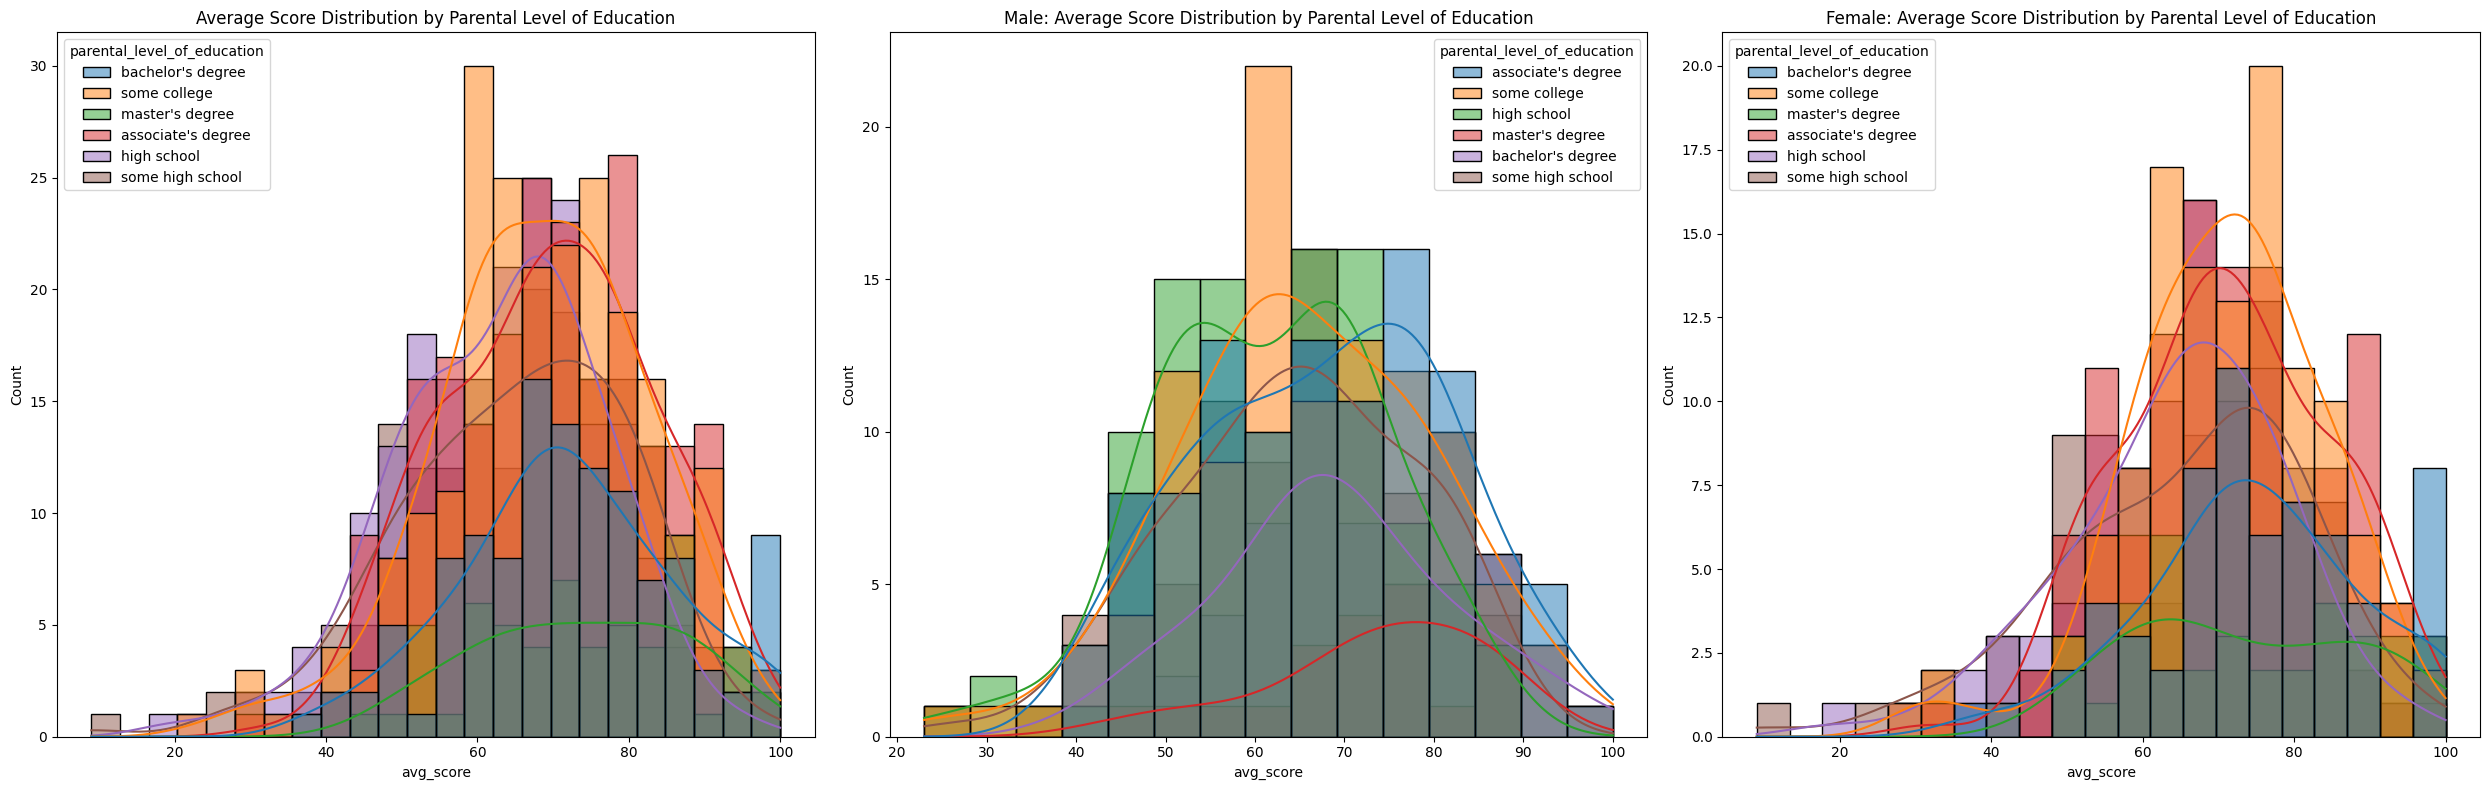

In [ ]:
# Histogram & KDE for average score by parental level of education
fig, axes = plt.subplots(1, 3, figsize=(25, 8))
sns.histplot(data=df, x='avg_score', kde=True, hue='parental_level_of_education', ax=axes[0])
axes[0].set_title('Average Score Distribution by Parental Level of Education')
sns.histplot(data=df[df.gender=='male'], x='avg_score', kde=True, hue='parental_level_of_education', ax=axes[1])
axes[1].set_title('Male: Average Score Distribution by Parental Level of Education')
sns.histplot(data=df[df.gender=='female'], x='avg_score', kde=True, hue='parental_level_of_education', ax=axes[2])
axes[2].set_title('Female: Average Score Distribution by Parental Level of Education')
plt.tight_layout()
plt.show()


In general parent's education don't help student perform well in exam.

2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam

3rd plot we can see there is no strong effect of parent's education on female students.

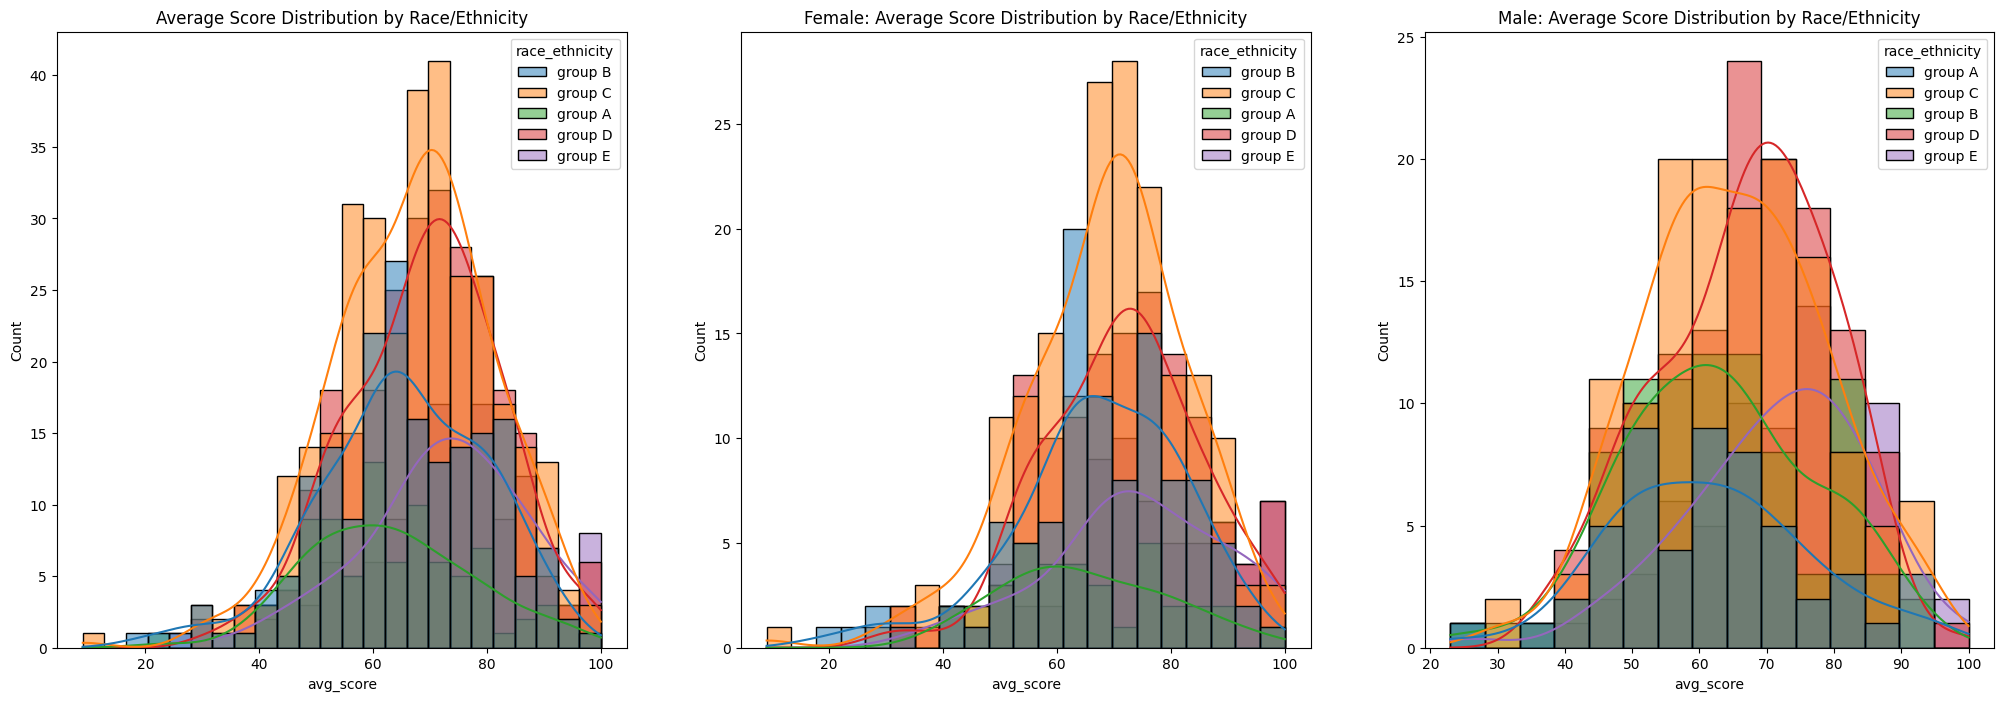

In [ ]:
# Histogram & KDE for average score by race/ethnicity
fig, axes = plt.subplots(1,3,figsize=(25,8))
sns.histplot(data=df,x='avg_score',kde=True,hue='race_ethnicity', ax=axes[0])
axes[0].set_title('Average Score Distribution by Race/Ethnicity')
sns.histplot(data=df[df.gender=='female'],x='avg_score',kde=True,hue='race_ethnicity', ax=axes[1])
axes[1].set_title('Female: Average Score Distribution by Race/Ethnicity')
sns.histplot(data=df[df.gender=='male'],x='avg_score',kde=True,hue='race_ethnicity', ax=axes[2])
axes[2].set_title('Male: Average Score Distribution by Race/Ethnicity')
plt.show()

Students of group A and group B tends to perform poorly in exam.

Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

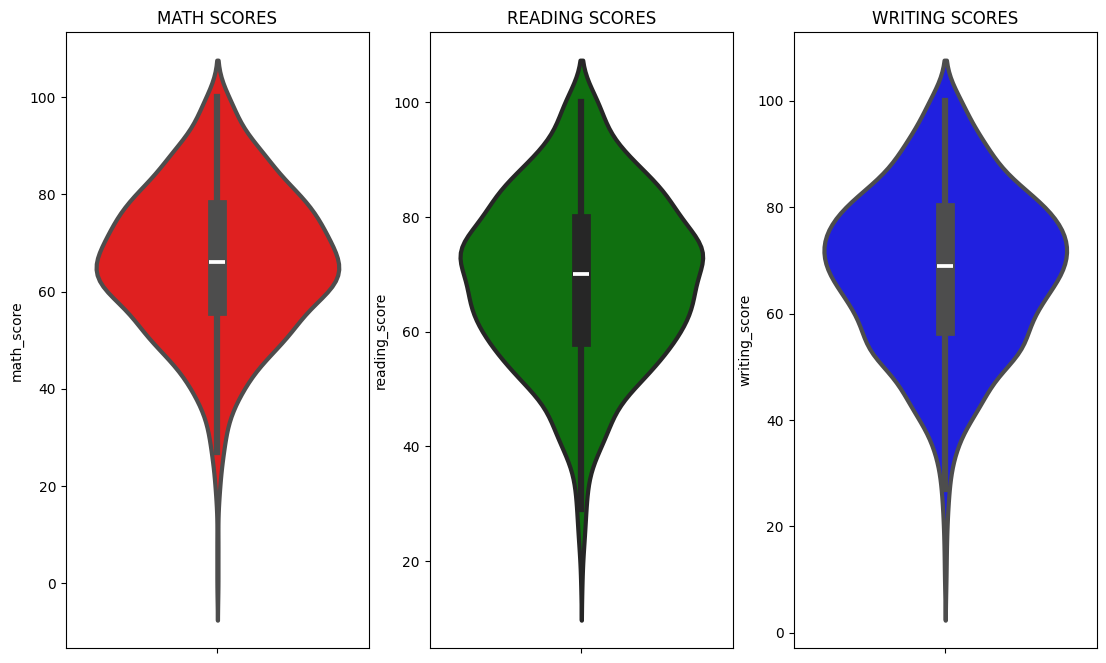

In [ ]:
# Maximumum score of students in all three subjects
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### Multivariate analysis using pieplot

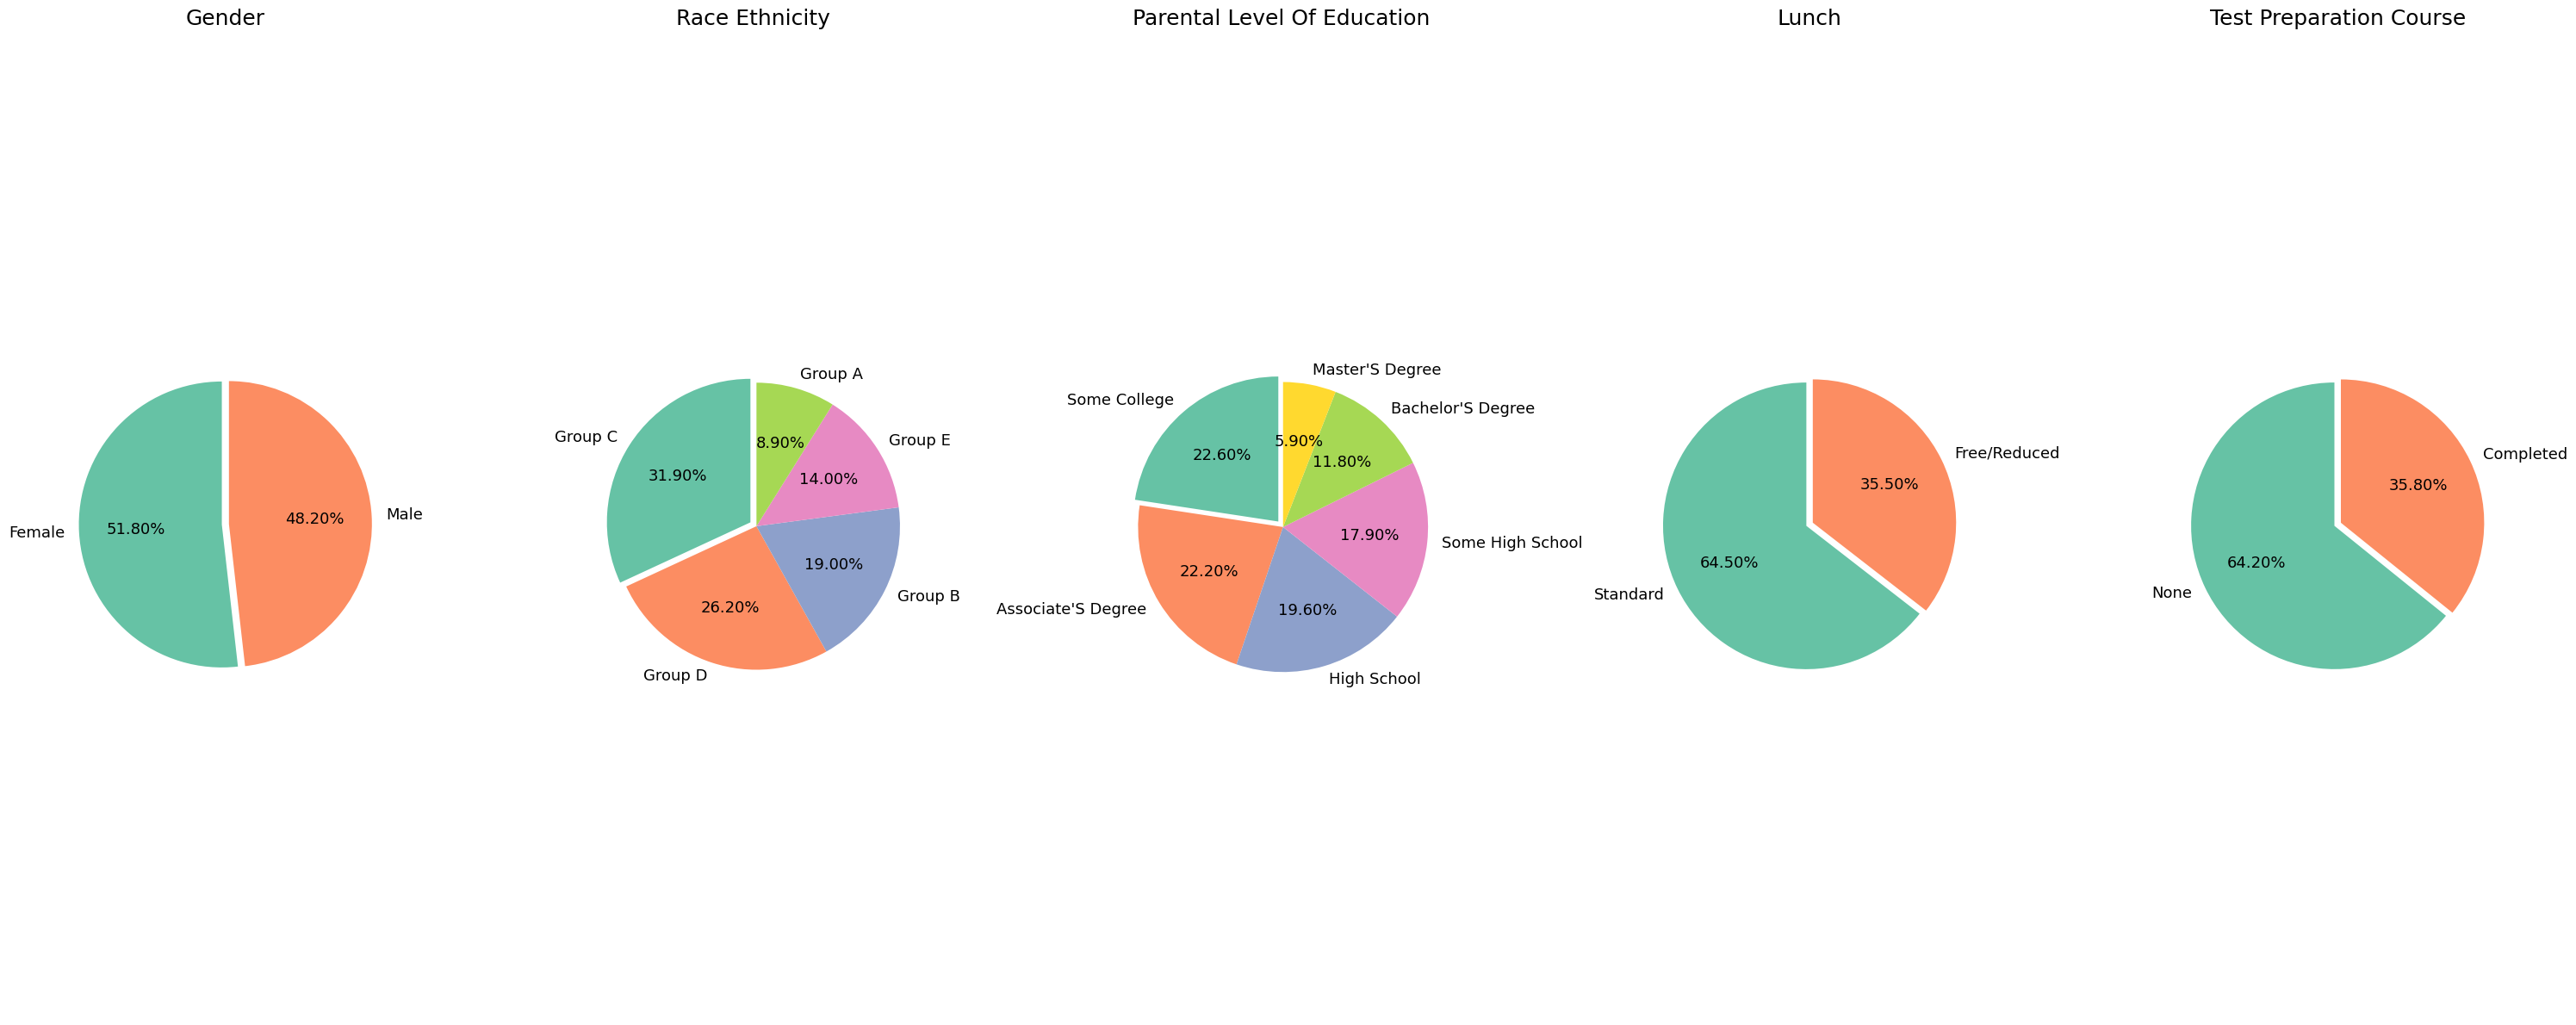

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(30, 12))

for ax, col in zip(axes, categorical_cols):
    counts = df[col].value_counts()
    labels = counts.index.str.title()  # nicer labels
    colors = sns.color_palette("Set2", n_colors=len(counts))
    explode = [0.05 if i == 0 else 0 for i in range(len(counts))]  # highlight largest slice
    ax.pie(counts, labels=labels, colors=colors, autopct='%.2f%%', startangle=90, explode=explode, textprops={'fontsize':13})
    ax.set_title(col.replace('_', ' ').title(), fontsize=18)
    ax.axis('equal')

plt.tight_layout()
plt.show()


Number of Male and Female students is almost equal

Number students are greatest in Group C

Number of students who have standard lunch are greater

Number of students who have not enrolled in any test preparation course is greater

Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"


### Feature-wise visualization

#### Feature: gender
Univariate analysis- how is distribution of Gender?

Bivariate analysis- is gender has any impact on student's performance?


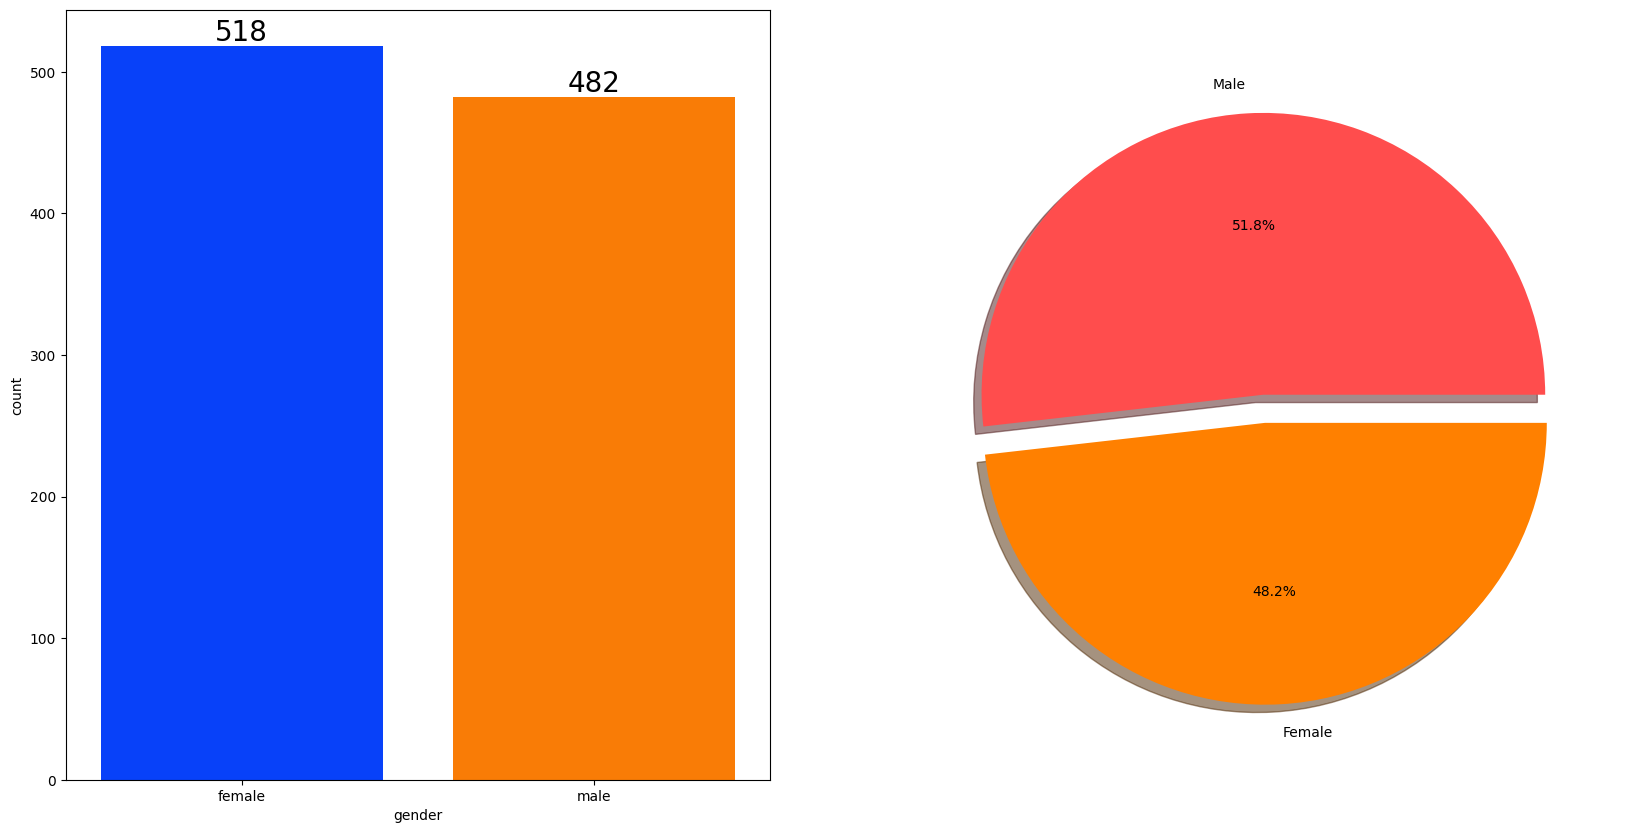

In [83]:
# Univariate ( How is distribution of Gender ? )
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

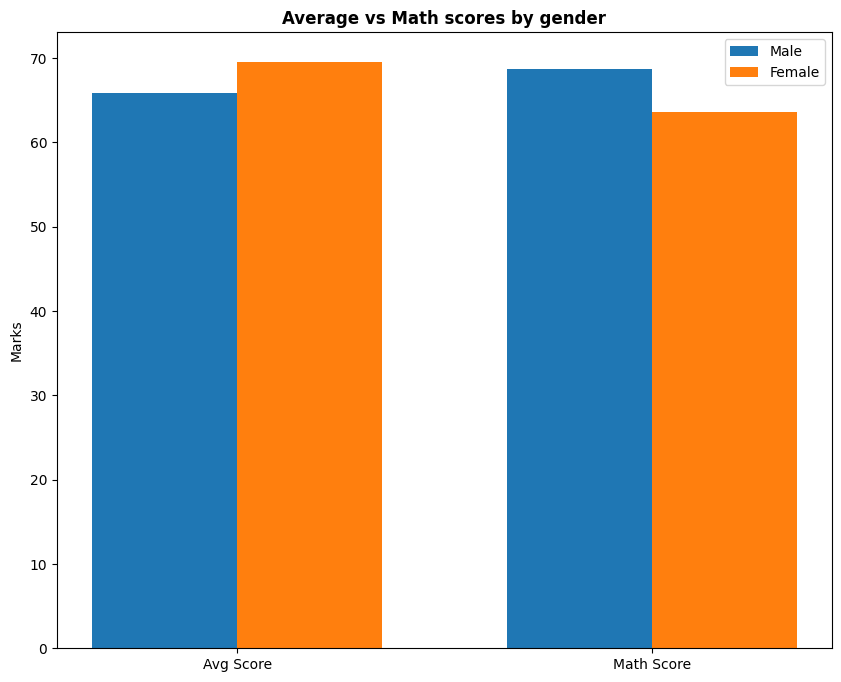

In [87]:
# BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )
# compute mean only for the numeric columns we need and use correct column names
gender_group = df.groupby('gender')[['avg_score', 'math_score']].mean()

plt.figure(figsize=(10, 8))

X = ['Avg Score', 'Math Score']

# access by gender labels to avoid positional/indexing issues
male_scores = gender_group.loc['male'].values
female_scores = gender_group.loc['female'].values

X_axis = np.arange(len(X))
width = 0.35
  
plt.bar(X_axis - width/2, male_scores, width, label='Male')
plt.bar(X_axis + width/2, female_scores, width, label='Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Average vs Math scores by gender", fontweight='bold')
plt.legend()
plt.show()

On an average females have a better overall score than men.

whereas males have scored higher in Maths.

In [10]:
# Gender summary table
gender_table = group_summary(df, "gender", include_std=True)
gender_table.sort_values("avg_score_mean", ascending=False)
print(gender_table)

   gender  count  math_score_mean  math_score_std  reading_score_mean  \
0  female    518            63.63           15.49               72.61   
1    male    482            68.73           14.36               65.47   

   reading_score_std  writing_score_mean  writing_score_std  avg_score_mean  \
0              14.38               72.47              14.84           69.57   
1              13.93               63.31              14.11           65.84   

   avg_score_std  
0          14.54  
1          13.70  


#### Feature: RACE/EHNICITY
Univariate analysis- how is Group wise distribution?

Bivariate analysis- is Race/Ehnicity has any impact on student's performance?

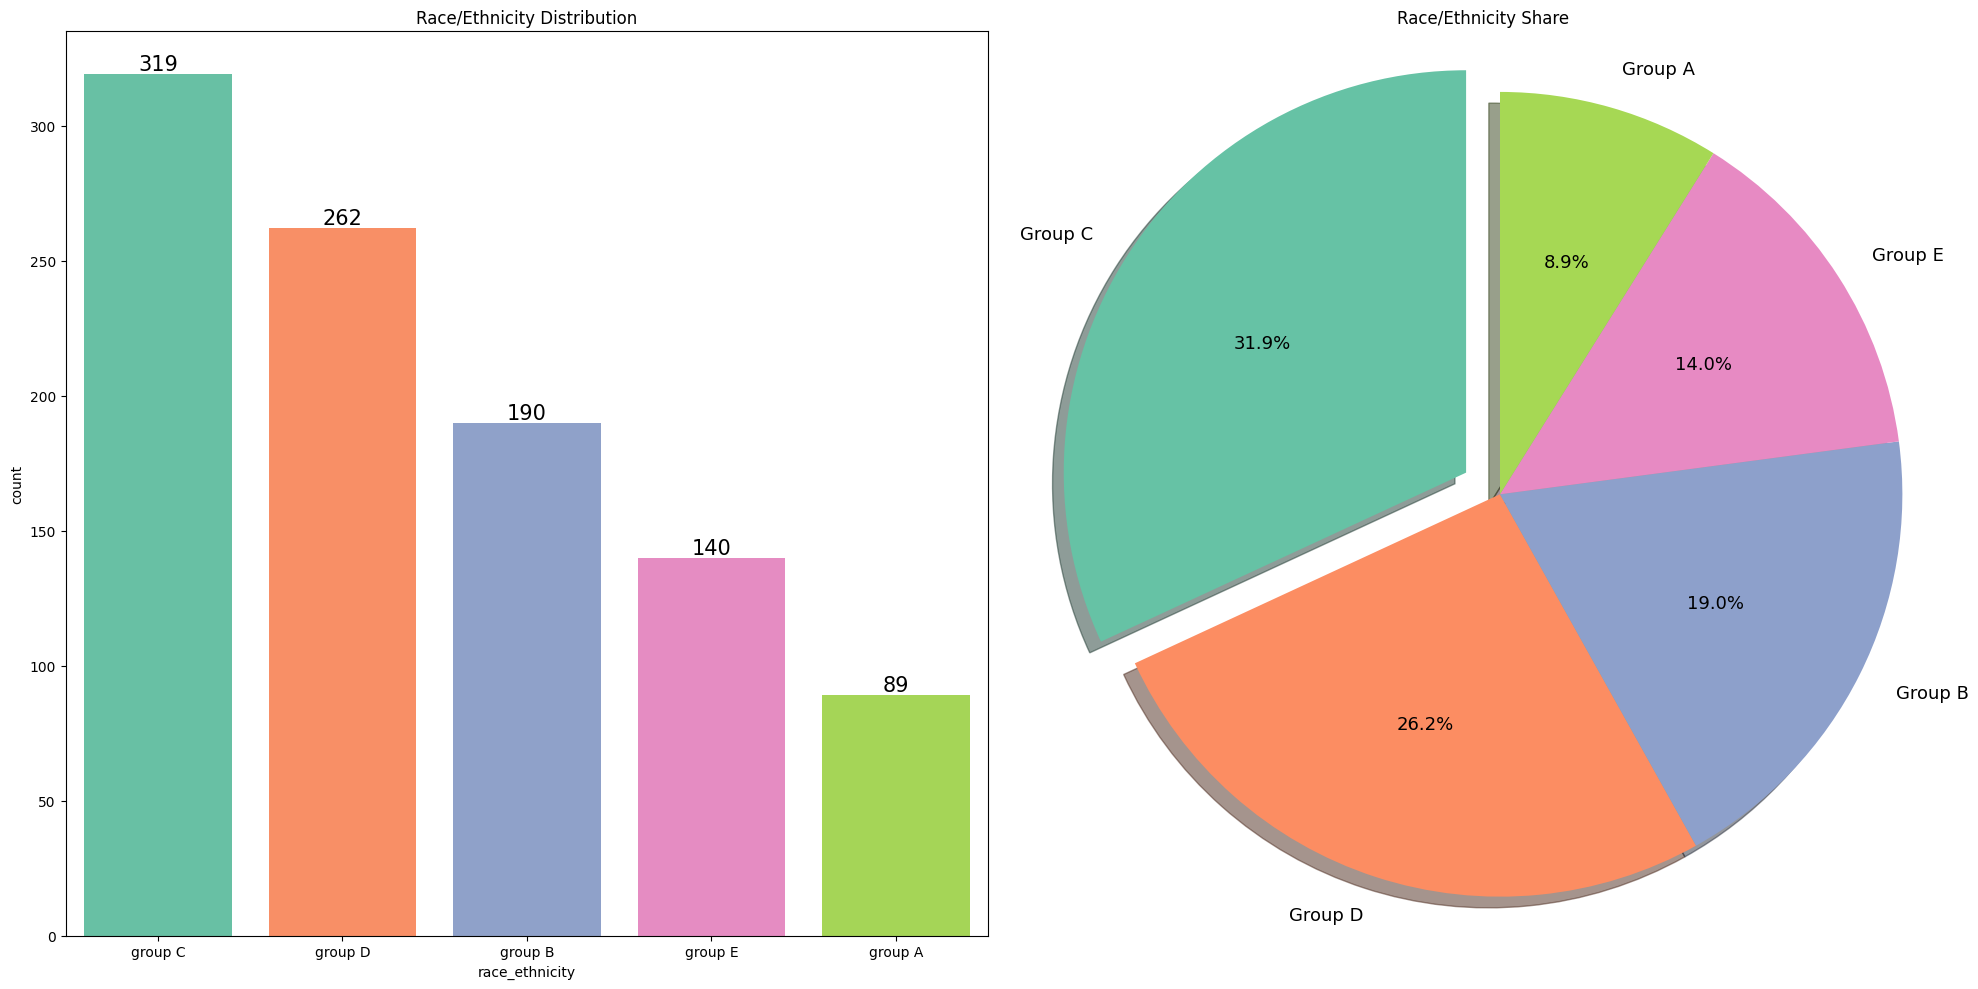

In [90]:
# Univariate analysis- how is Group wise distribution?
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# get counts in descending order and create a matching color palette
counts = df['race_ethnicity'].value_counts()
colors = sns.color_palette('Set2', n_colors=len(counts))

# bar chart (use same order as counts)
sns.countplot(x='race_ethnicity', data=df, order=counts.index, palette=colors, ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)
ax[0].set_title('Race/Ethnicity Distribution')

# pie chart with the same colors and matching order
explode = [0.1] + [0] * (len(counts) - 1)
ax[1].pie(counts.values, labels=counts.index.str.title(), explode=explode, autopct='%1.1f%%', shadow=True, colors=colors, startangle=90, textprops={'fontsize':13})
ax[1].set_title('Race/Ethnicity Share')
ax[1].axis('equal')

plt.tight_layout()
plt.show()

Most of the student belonging from group C / group D.

Lowest number of students belong to groupA.

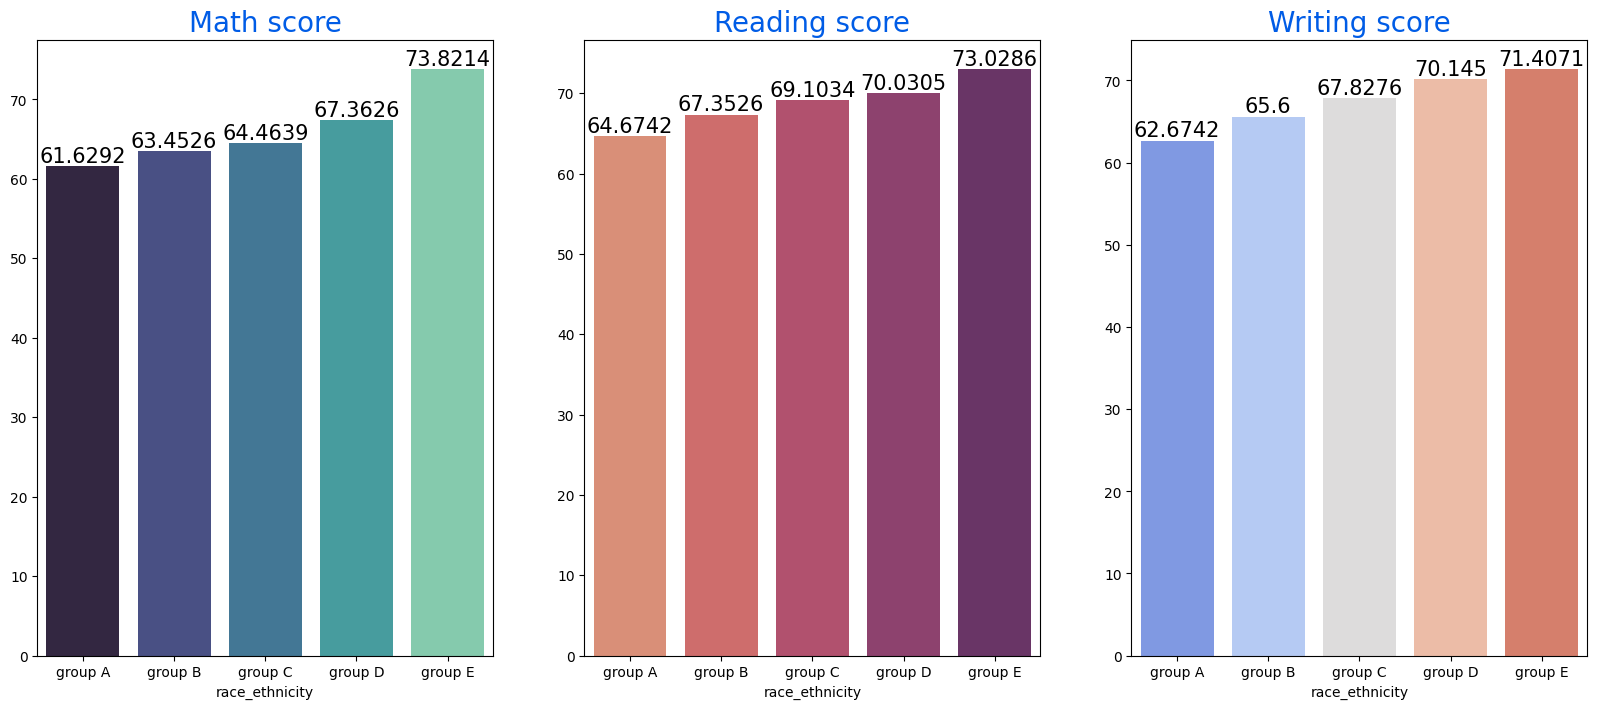

In [93]:
# BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance? )
Group_data2=df.groupby('race_ethnicity')

f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Group E students have scored the highest marks.

Group A students have scored the lowest marks.

Students from a lower Socioeconomic status have a lower avg in all course subjects

#### Feature: Parental level of education
UNIVARIATE ANALYSIS ( What is educational background of student's parent? )

BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

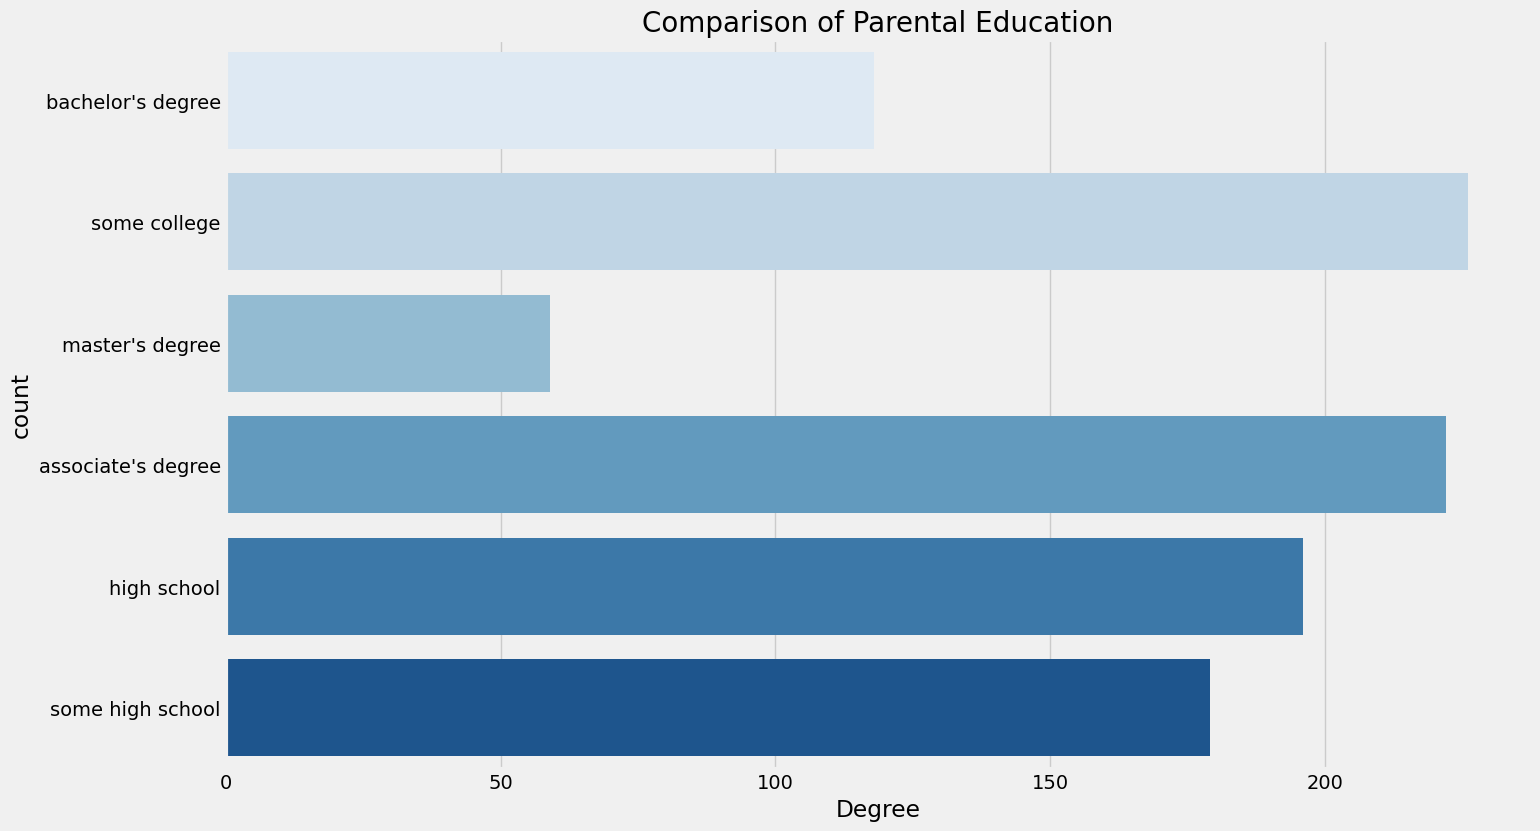

In [103]:
# UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

Largest number of parents are from some college or have associate's degree

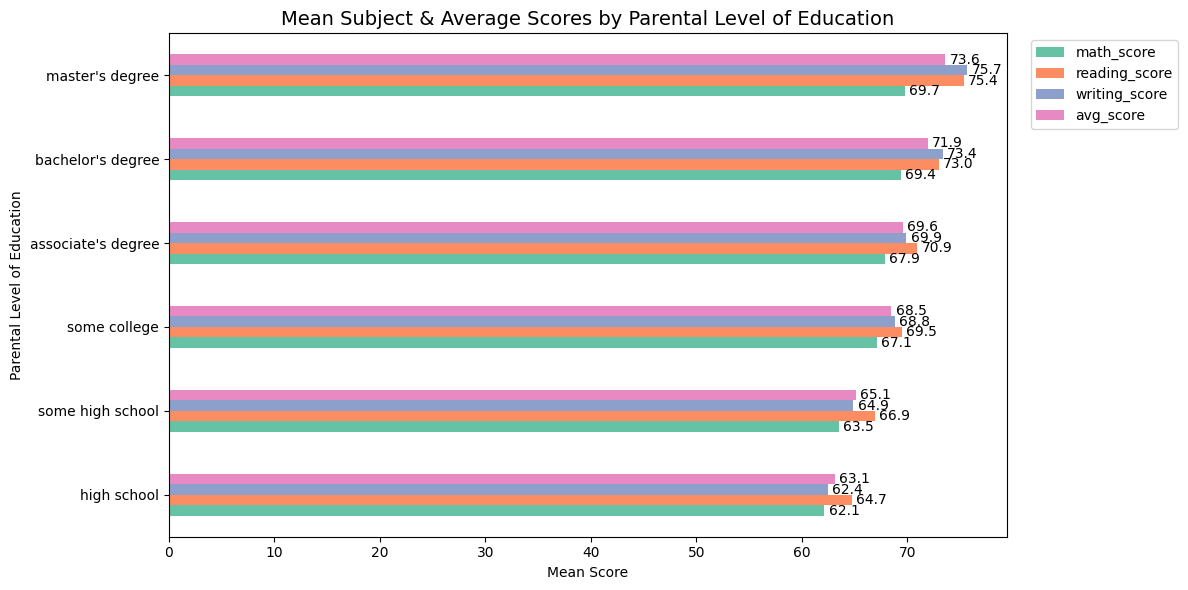

In [7]:
# BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )
# Aggregate only numeric columns to avoid taking mean of string columns
order = (
    df.groupby("parental_level_of_education")["avg_score"]
      .mean()
      .sort_values()
      .index
)
order

plot_df = df.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score', 'avg_score']].mean(numeric_only=True).loc[order]

ax = plot_df.plot(kind='barh', figsize=(12, 6), color=sns.color_palette('Set2', n_colors=4))
ax.set_title('Mean Subject & Average Scores by Parental Level of Education', fontsize=14)
ax.set_xlabel('Mean Score')
ax.set_ylabel('Parental Level of Education')

# Annotate bar values
for p in ax.patches:
    ax.text(p.get_width() + 0.4, p.get_y() + p.get_height() / 2, f'{p.get_width():.1f}', va='center', fontsize=10)

plt.legend(title='', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

The score of student whose parents possess master and bachelor level education are higher than others.

#### Feature: lunch
UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

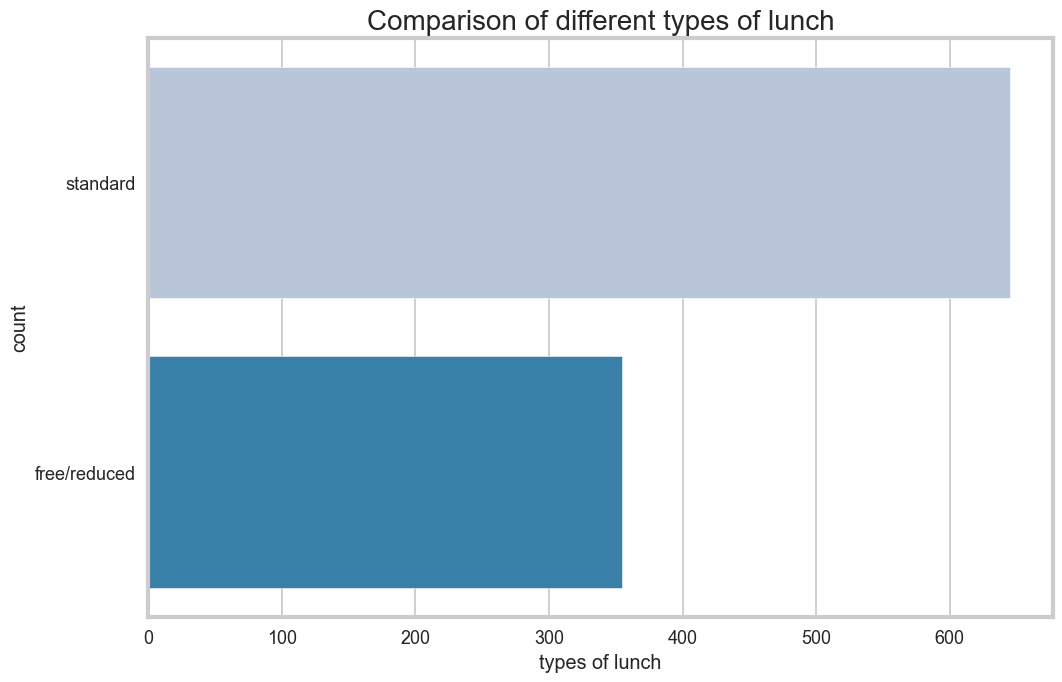

In [114]:
# UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('seaborn-v0_8-talk')  # or use 'seaborn' if this doesn't work
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

Students being served Standard lunch was more than free lunch

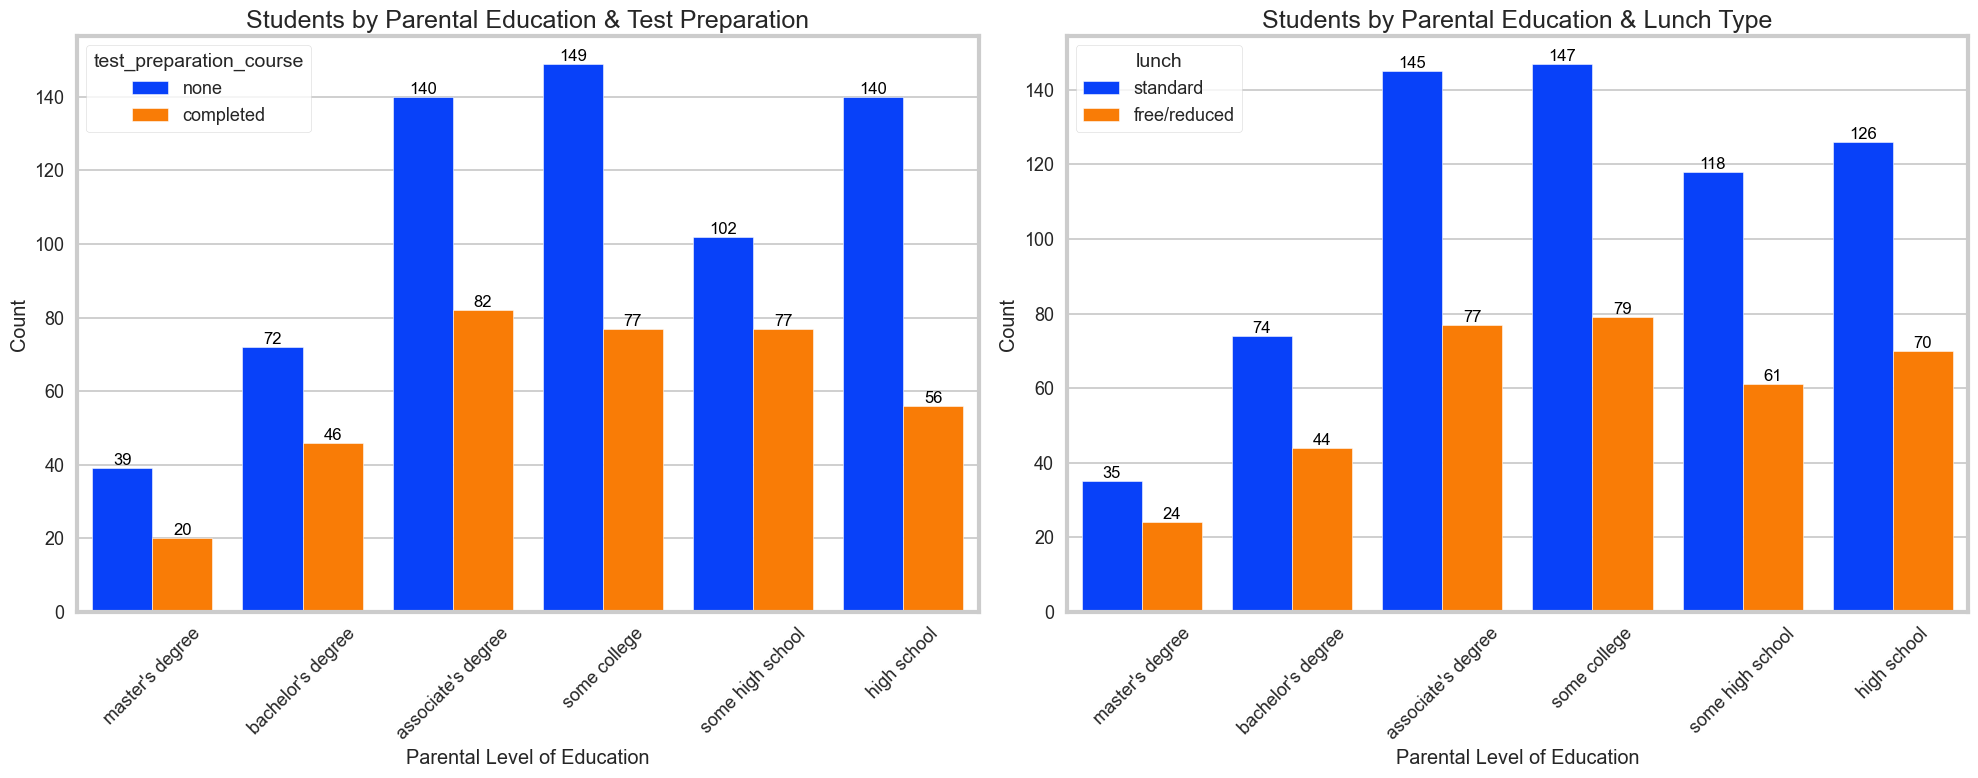

In [119]:
# BIVARIATE ANALYSIS ( Parental education vs test preparation course and lunch )
f, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.countplot(x='parental_level_of_education', data=df, hue='test_preparation_course',
              order=order, palette='bright', saturation=0.95, ax=ax[0])
ax[0].set_title('Students by Parental Education & Test Preparation', fontsize=18)
ax[0].set_xlabel('Parental Level of Education')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x', rotation=45)
for container in ax[0].containers:
    ax[0].bar_label(container, fmt='%d', color='black', size=12)

sns.countplot(x='parental_level_of_education', data=df, hue='lunch',
              order=order, palette='bright', saturation=0.95, ax=ax[1])
ax[1].set_title('Students by Parental Education & Lunch Type', fontsize=18)
ax[1].set_xlabel('Parental Level of Education')
ax[1].set_ylabel('Count')
ax[1].tick_params(axis='x', rotation=45)
for container in ax[1].containers:
    ax[1].bar_label(container, fmt='%d', color='black', size=12)

plt.tight_layout()
plt.show()

Across all education levels, more students skipped prep than completed it.

Standard lunch outnumbers free/reduced in every education group, but the free/reduced share grows as parental education decreases.

Lower parental education corresponds to larger student counts, lower prep-course participation rates, and higher reliance on free/reduced lunch—signals of socioeconomic differences that may influence performance.

In [11]:
# Lunch summary table
lunch_table = group_summary(df, "lunch", include_std=True)
lunch_table.sort_values("avg_score_mean", ascending=False)
print(lunch_table)

          lunch  count  math_score_mean  math_score_std  reading_score_mean  \
0  free/reduced    355            58.92           15.16               64.65   
1      standard    645            70.03           13.65               71.65   

   reading_score_std  writing_score_mean  writing_score_std  avg_score_mean  \
0              14.90               63.02              15.43           62.20   
1              13.83               70.82              14.34           70.84   

   avg_score_std  
0          14.46  
1          13.19  


#### Feature: test preparation course
Univariate analysis- which type of test preparation course is most common among students?

Bivariate analysis - Is Test prepration course has any impact on student's performance ?

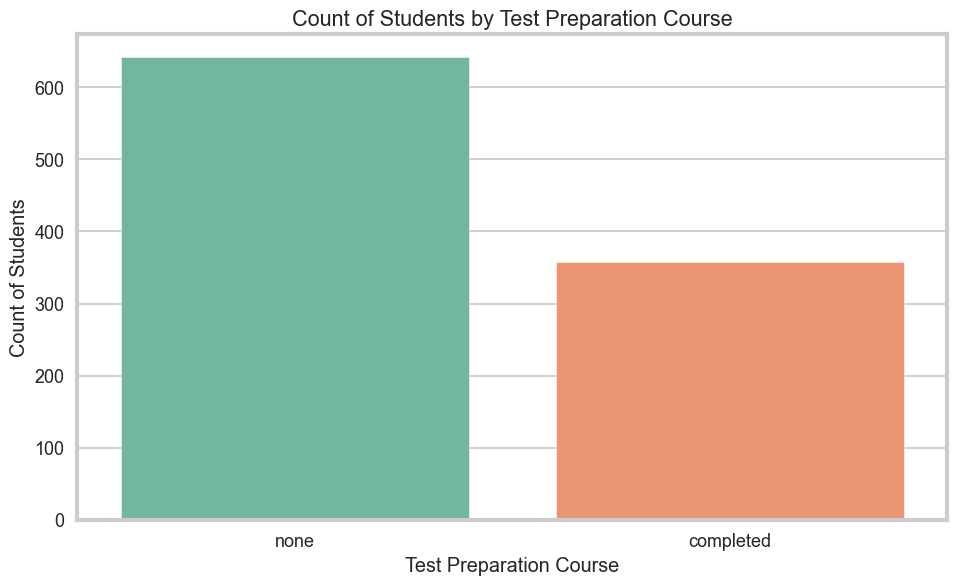

In [120]:
# Univariate analysis- which type of test preparation course is most common among students?
plt.figure(figsize=(10, 6))
sns.countplot(x='test_preparation_course', data=df, palette='Set2')
plt.title('Count of Students by Test Preparation Course')
plt.xlabel('Test Preparation Course')
plt.ylabel('Count of Students')
plt.show()

Most students haven't taken any test prep course

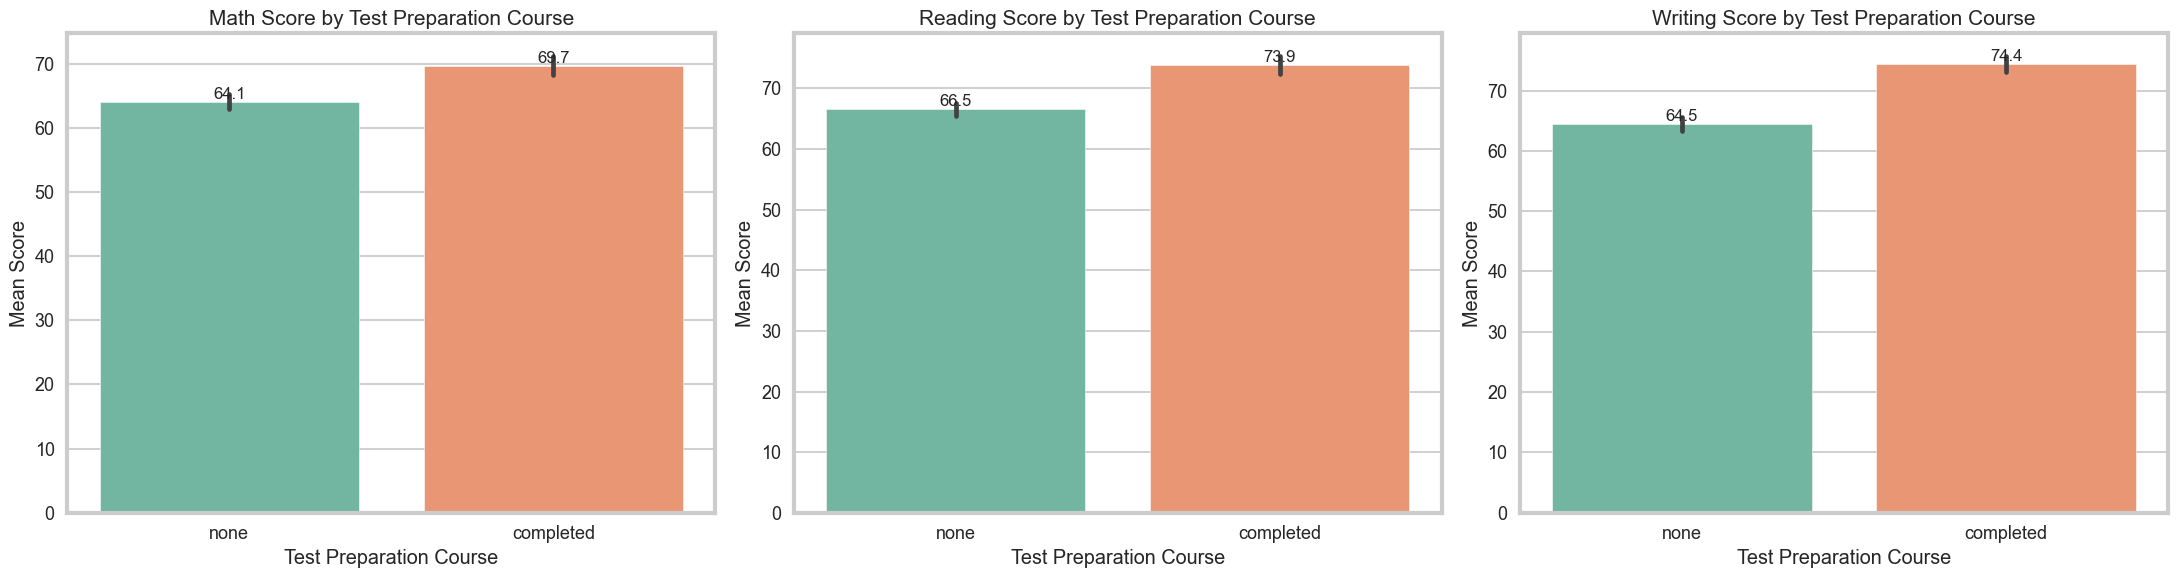

In [128]:
# Bivariate analysis - Is Test preparation course has any impact on student's performance?
subjects = ['math_score', 'reading_score', 'writing_score']
titles = ['Math Score', 'Reading Score', 'Writing Score']

fig, axes = plt.subplots(1, 3, figsize=(22, 6))

for i, subject in enumerate(subjects):
    sns.barplot(
        x='test_preparation_course',
        y=subject,
        data=df,
        order=['none', 'completed'],
        palette='Set2',
        ax=axes[i]
    )
    axes[i].set_title(f'{titles[i]} by Test Preparation Course', fontsize=15)
    axes[i].set_xlabel('Test Preparation Course')
    axes[i].set_ylabel('Mean Score')
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.1f', fontsize=12)

plt.tight_layout()
plt.show()


Students who have completed the Test Prepration Course have slightly higher scores in all three categories than those who haven't taken the course

In [12]:
# Test preparation course summary table
prep_table = group_summary(df, "test_preparation_course", include_std=True)
prep_table.sort_values("avg_score_mean", ascending=False)
print(prep_table)

  test_preparation_course  count  math_score_mean  math_score_std  \
0               completed    358            69.70           14.44   
1                    none    642            64.08           15.19   

   reading_score_mean  reading_score_std  writing_score_mean  \
0               73.89              13.64               74.42   
1               66.53              14.46               64.50   

   writing_score_std  avg_score_mean  avg_score_std  
0              13.38           72.67          13.04  
1              15.00           65.04          14.19  


### Checking outliers

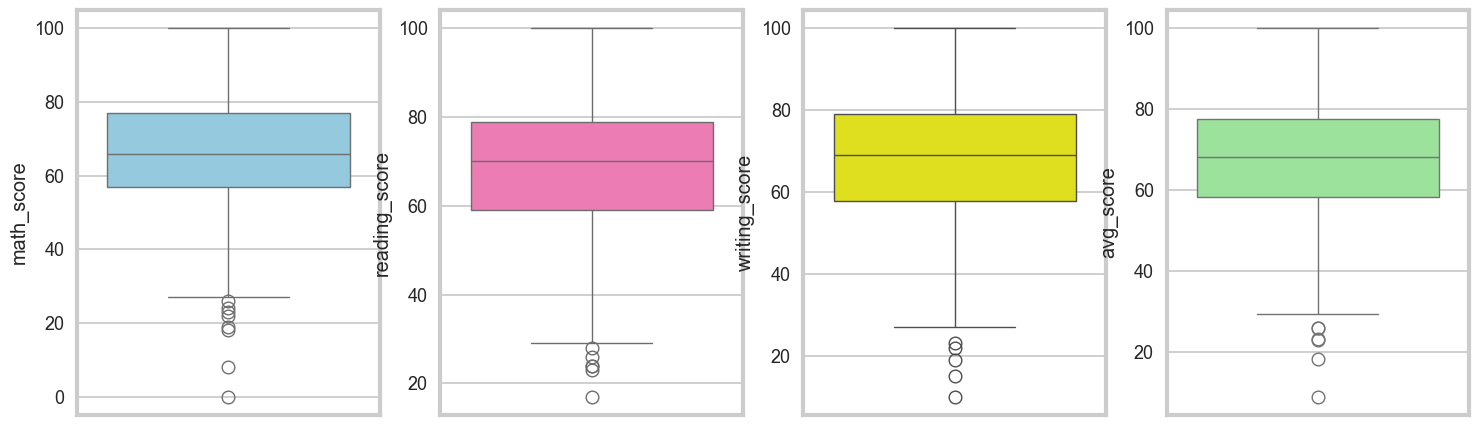

In [130]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['avg_score'],color='lightgreen')
plt.show()

Typical performance is solidly above 60 in all subjects, best in reading/writing, but a small group of students struggles, especially in math; overall averages mirror the subject patterns.

### Multivariate analysis using pairplot

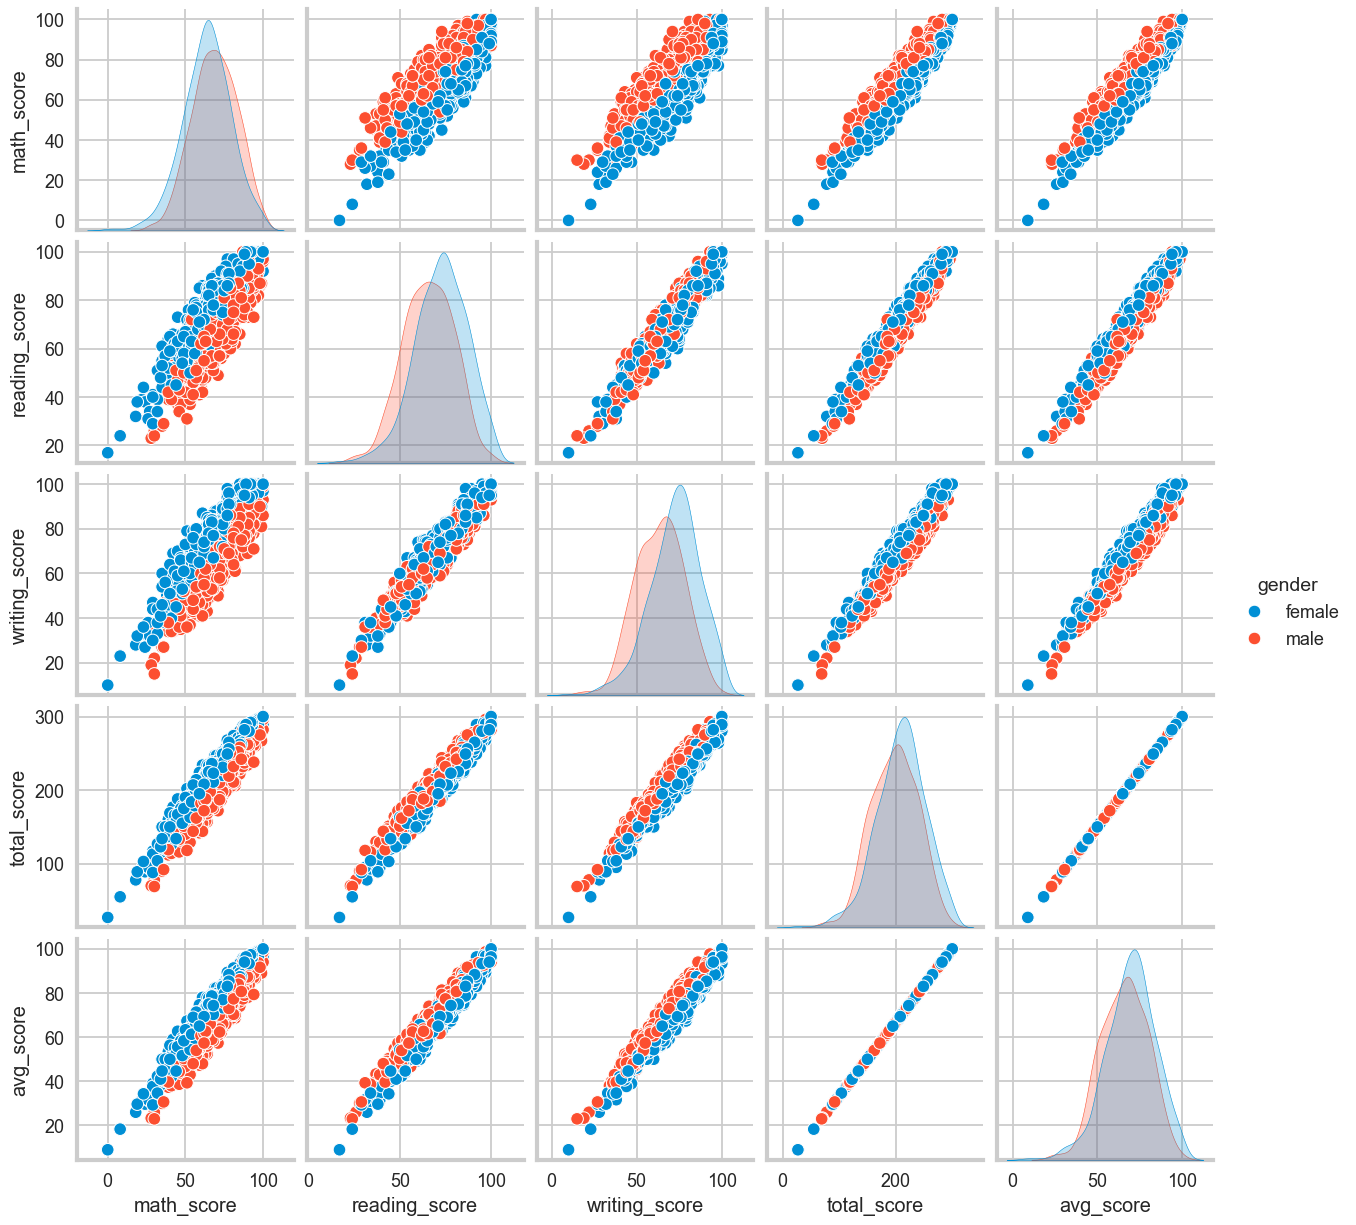

In [131]:
sns.pairplot(df,hue = 'gender')
plt.show()

Every pair of score variables is strongly positively correlated; points form tight diagonals. Higher reading/writing almost always coincide with higher math, total, and average scores.

The tight linear bands for total_score and avg_score against each subject confirm they’re just combinations of the three subject scores (no extra variation).

Outliers are few and lie near the axes, but still follow the same upward trend, reinforcing the strong overall relationship among subjects.

## Overall

Student's Performance is related with lunch, race, parental level education.

Females have higher average scores and also are top-scorers.

Student's Performance is slighltly related with test preparation course.

Finishing preparation course is benefitial.